In [257]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

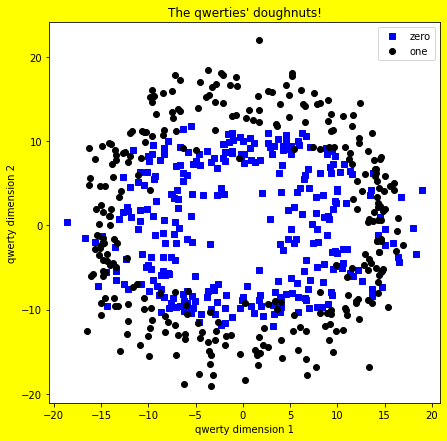

In [272]:
NumClust=300
deg=np.linspace(0,4*np.pi,NumClust,NumClust)
Rad1=10
Rad2=15

#generate data
a=[Rad1*np.cos(deg)+np.random.randn(NumClust)*4,\
   Rad1*np.sin(deg)+np.random.randn(NumClust)]
b=[Rad2*np.cos(deg)+np.random.randn(NumClust),\
   Rad2*np.sin(deg)+np.random.randn(NumClust)*3]

labels_np=np.vstack((np.zeros((NumClust,1)),np.ones((NumClust,1))))
#concatante datas
data_np=np.hstack((a,b)).T
#convert torch tensor
data=torch.tensor(data_np).float()
label=torch.tensor(labels_np).float()
#showing data
fig=plt.figure(figsize=(7,7),facecolor='yellow',edgecolor='red')
plt.plot(data[np.where(label==0)[0],0],data[np.where(label==0)[0],1],'bs')
plt.plot(data[np.where(label==1)[0],0],data[np.where(label==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.legend(['zero','one'])
plt.show()

Seperate data to train and test

In [273]:
train_data,test_data,train_label,test_label=train_test_split(
            data,label,train_size=0.8)
print(f"data shape:{data.shape}")
print(f"train and test data shape:{train_data.shape},{test_data.shape}")

train_data_and_label=TensorDataset(train_data,train_label)
test_data_and_label=TensorDataset(test_data,test_label)

train_loader=DataLoader(train_data_and_label,batch_size=32,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data_and_label,batch_size=test_data_and_label.tensors[0].shape[0])

data shape:torch.Size([600, 2])
train and test data shape:torch.Size([480, 2]),torch.Size([120, 2])


create class for call back ANN

In [287]:
class theModelClass(nn.Module):
    def __init__(self,droupRate):
        super().__init__()
        self.input=nn.Linear(2,128)
        self.hidden=nn.Linear(128,128)
        self.output=nn.Linear(128,1)
        self.dr=droupRate
    def forward(self,data):
        data=F.relu(self.input(data))
        data=F.dropout(data,p=self.dr,training=self.training)
        data=F.relu(self.hidden(data))
        data=F.dropout(data,p=self.dr,training=self.training)
        # data=F.relu(self.hidden(data))
        # data=F.dropout(data,p=self.dr,training=self.training)
        data=self.output(data)
        return data

In [291]:
def createNewModel(dropoutrate):
    ANNque=theModelClass(dropoutrate)
    lossfun=nn.BCEWithLogitsLoss()
    # lossfun=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(ANNque.parameters(),lr=.01)
    return ANNque,lossfun,optimizer

call back ANN and execute

In [289]:
def trainTheModel(train_data,test_data,Numepoch=1000,dropout=.0,ANNque=None,lossfun=None,optimizer=None):
    trainAcc=[]
    testAcc=[]
    losses=[]
    for epoch in range(Numepoch):
        ANNque.train()
        batchAcc=[]
        lossVal=[]
        for dat,lab in train_data:
            yHat=ANNque(dat)

            loss=lossfun(yHat,lab)
            lossVal.append(loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()            

            batchAcc.append(100*torch.mean(((yHat>0)==lab).float()).item())
            lossVal.append(loss.item())
        trainAcc.append(np.mean(batchAcc))
        losses.append(torch.mean(torch.tensor(lossVal)))

        ANNque.eval()
        dat,lab=next(iter(test_data))
        yHat=ANNque(dat)
        testAcc.append(100*torch.mean(((yHat>0)==lab).float()).item())
    
    return trainAcc,testAcc,losses

In [282]:
#1D smooth filter
def smooth(x,k=5):
    return np.convolve(x,np.ones(k)/k,mode='same')

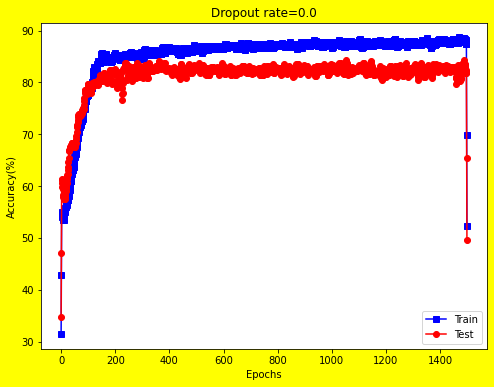

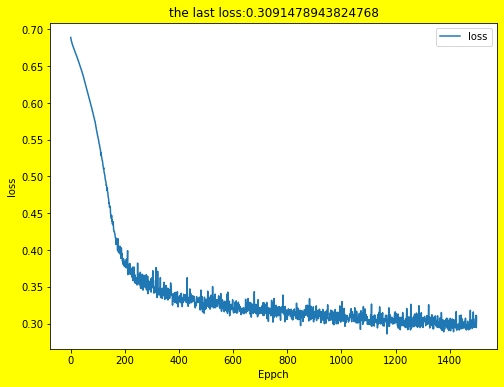

In [293]:
dropRate=.0
ANNque,lossfun,optimizer=createNewModel(dropRate)
trainAcc,testAcc,losses=trainTheModel(train_loader,
                                      test_loader,Numepoch=1500,\
                                      dropout=dropRate,ANNque=ANNque,
                                      lossfun=lossfun,optimizer=optimizer)
fig=plt.figure(figsize=(8,6),facecolor='yellow')
plt.plot(smooth(trainAcc),'bs-')
plt.plot(smooth(testAcc),'ro-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['Train','Test'])
plt.title(f'Dropout rate={dropRate}')

fig=plt.figure(figsize=(8,6),facecolor='yellow')
plt.plot(losses)
plt.xlabel('Eppch')
plt.ylabel('loss')
plt.legend(['loss'])
plt.title(f'the last loss:{losses[-1]}')
plt.show()

testing 

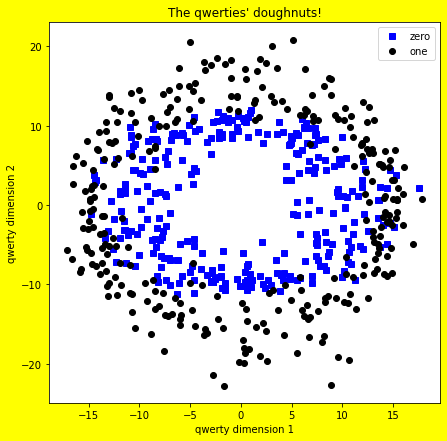

In [294]:
NumClust=300
deg=np.linspace(0,4*np.pi,NumClust,NumClust)
Rad1=10
Rad2=15

#generate data
a=[Rad1*np.cos(deg)+np.random.randn(NumClust)*3,\
   Rad1*np.sin(deg)+np.random.randn(NumClust)]
b=[Rad2*np.cos(deg)+np.random.randn(NumClust),\
   Rad2*np.sin(deg)+np.random.randn(NumClust)*3]

labels_np=np.vstack((np.zeros((NumClust,1)),np.ones((NumClust,1))))
#concatante datas
data_np=np.hstack((a,b)).T
#convert torch tensor
testdata=torch.tensor(data_np).float()
testlabel=torch.tensor(labels_np).float()
#showing data
fig=plt.figure(figsize=(7,7),facecolor='yellow',edgecolor='red')
plt.plot(testdata[np.where(testlabel==0)[0],0],testdata[np.where(testlabel==0)[0],1],'bs')
plt.plot(testdata[np.where(testlabel==1)[0],0],testdata[np.where(testlabel==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.legend(['zero','one'])
plt.show()

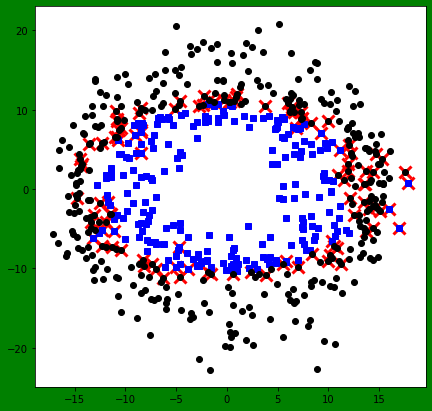

In [295]:
prediction=ANNque(testdata)
prediction=torch.sigmoid(prediction)
prediction_label=prediction>0.5
fig=plt.figure(figsize=(7,7),facecolor='green')
misclassified=np.where(prediction_label!=testlabel)[0]
plt.plot(testdata[misclassified,0],testdata[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(testdata[np.where(~prediction_label)[0],0],testdata[np.where(~prediction_label)[0],1],'bs')
plt.plot(testdata[np.where(prediction_label)[0],0],testdata[np.where(prediction_label)[0],1],'ko')

try to testing differente dropout values

In [ ]:
dropoutRates=np.arange(1)/10
results=np.zeros((len(dropoutRates),2))

for i in range(len(dropoutRates)):
    dropRate=.0
    ANNque,lossfun,optimizer=createNewModel(dropRate)
    trainAcc,testAcc,losses=trainTheModel(train_loader,
                                      test_loader,Numepoch=1000,\
                                      dropout=dropRate,ANNque=ANNque,
                                      lossfun=lossfun,optimizer=optimizer)
    results[i,0]=np.mean(trainAcc[-200])
    results[i,1]=np.mean(testAcc[-200])

fig=plt.figure(figsize=(8,6),facecolor='red')
plt.plot(dropoutRates,results,'o-')
plt.xlabel('dropout proportion')
plt.ylabel('Average accuracy')
plt.legend(['Train','Test'])

fig=plt.figure(figsize=(8,6),facecolor='red')
plt.plot(dropoutRates,-np.diff(results,axis=1),'o-')
plt.plot([0,1],[0,0],'k--')
plt.xlabel('Dropout proportion')
plt.ylabel('Train-test difference (acc%)')
plt.show()  